<a href="https://colab.research.google.com/github/Swami-Siva-Rama-Raju/ML-Algorithms-Projects/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler

**Loading Data**

In [ ]:
titanic_dataset=pd.read_csv('/content/drive/MyDrive/Logistic Regression/Titanic-Dataset.csv')

In [ ]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_dataset.shape

(891, 12)

In [ ]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
titanic_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Data Visualization**

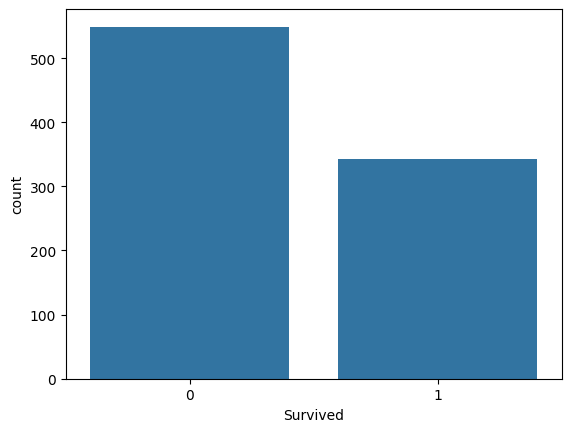

In [ ]:
#Countplot of survived vs not survived
sns.countplot(x='Survived',data=titanic_dataset)
plt.show()

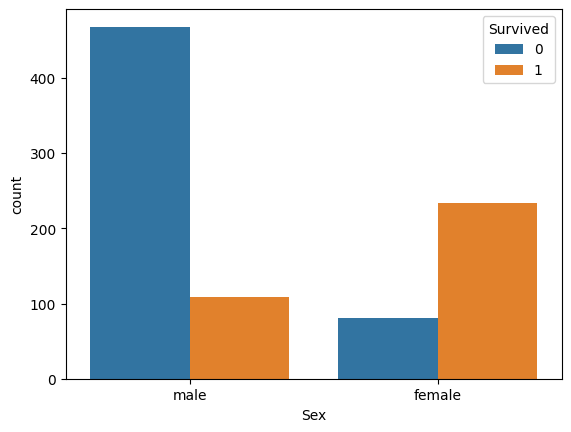

In [ ]:
#Male vs Female Survived
sns.countplot(x='Sex',hue='Survived',data=titanic_dataset)
plt.show()

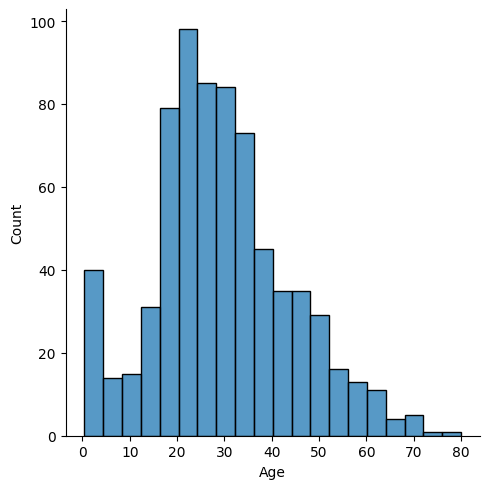

In [ ]:
#Distribution plot of age column
sns.displot(x='Age',data=titanic_dataset)
plt.show()

**Data Cleaning&Preprocessing**

In [ ]:
titanic_dataset.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


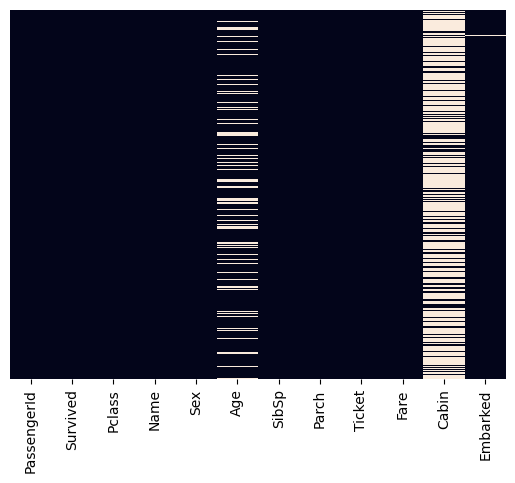

In [ ]:
#visualize null values
sns.heatmap(titanic_dataset.isnull(),yticklabels=False,cbar=False)
plt.show()

In [ ]:
#Checking null value percentage of age column
print("Null value % of Age Column:",titanic_dataset['Age'].isnull().sum()/len(titanic_dataset['Age'])*100 , "%")

Null value % of Age Column: 19.865319865319865 %


*if null value percentage is less than 30 then we can use some data ceaning approach for filling those*

In [ ]:
#Filling null values in age column
titanic_dataset['Age']=titanic_dataset['Age'].fillna(titanic_dataset['Age'].mean())

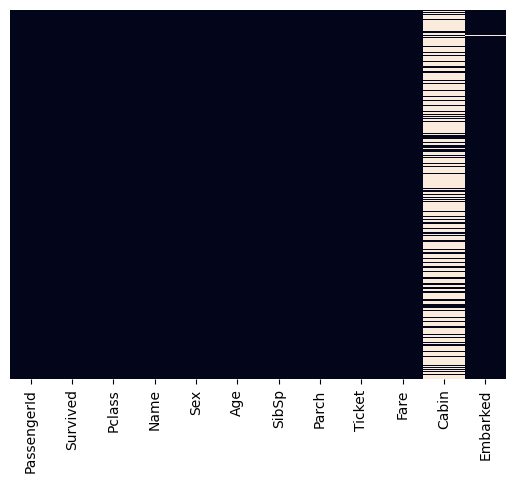

In [ ]:
#visualize null values
sns.heatmap(titanic_dataset.isnull(),yticklabels=False,cbar=False)
plt.show()

In [ ]:
#Checking null value percentage of Cabin column
print("Null value % of Cabin Column:",titanic_dataset['Cabin'].isnull().sum()/len(titanic_dataset['Cabin'])*100,"%")

Null value % of Cabin Column: 77.10437710437711 %


In [ ]:
#Remove Cabin column because null value percentage is more
titanic_dataset.drop('Cabin',axis=1,inplace=True)

In [ ]:
#Name Embarked Ticket are non-numeric and also not useful so drop them
titanic_dataset.drop(['Name','Ticket','Embarked'],axis=1,inplace=True)

In [ ]:
#convert sex column to numeric
titanic_dataset['Sex']=titanic_dataset['Sex'].map({'male':1,'female':0})

In [ ]:
#Adding new columns for better performance of model
titanic_dataset['FamilySize'] = titanic_dataset['SibSp'] + titanic_dataset['Parch'] + 1
titanic_dataset['IsAlone'] = (titanic_dataset['FamilySize'] == 1).astype(int)

In [ ]:
titanic_dataset.drop(['SibSp','Parch'],axis=1,inplace=True)

In [ ]:
scaler = StandardScaler()
titanic_dataset[['Age', 'Fare']] = scaler.fit_transform(titanic_dataset[['Age', 'Fare']])

**Data Modelling**

In [ ]:
#seperate dependent and independent features
X=titanic_dataset.drop('Survived',axis=1)
Y=titanic_dataset['Survived']

In [ ]:
#train test split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=42)

In [ ]:
#fit logistic regression
model=LogisticRegression(max_iter=1000)

In [ ]:
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [ ]:
#predict
Y_pred=model.predict(X_test)

**Evaluating the model**

In [ ]:
#Confusion Matrix
model_cm=pd.DataFrame(confusion_matrix(Y_test,Y_pred),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])
model_cm

,Predicted No,Predicted Yes
Actual No,155,20
Actual Yes,34,86


In [ ]:
#Classification Report
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(Y_test,Y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       175
           1       0.81      0.72      0.76       120

    accuracy                           0.82       295
   macro avg       0.82      0.80      0.81       295
weighted avg       0.82      0.82      0.81       295



In [ ]:
#Accuracy Score
print("Accuracy Score Percentage is :",round(accuracy_score(Y_test,Y_pred)*100),"%")

Accuracy Score Percentage is : 82 %
